<h2>Upper Confidence Bound (UCB)</h2> 
<h3>To predict best out of many things (best ad out of 10 ads)</h3>
<h3>Deterministic Algorithm</h3>
<img src="../../images/ucb.png" width="650px">

## Importing the libraries

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [17]:
dataset = pd.read_csv('../../datasets/Ads_CTR_Optimisation.csv')

## Implementing UCB

In [18]:
import math
# 10000 rows of data
# can take only 500 samples of row and test
N = 10000
# 10 columns of ads
d = 10
ads_selected = []
numbers_of_selections = [0] * d
sums_of_rewards = [0] * d
total_reward = 0
for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    for i in range(0, d):
        if (numbers_of_selections[i] > 0):
            average_reward = sums_of_rewards[i] / numbers_of_selections[i]
            delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    numbers_of_selections[ad] = numbers_of_selections[ad] + 1
    reward = dataset.values[n, ad]
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward
    total_reward = total_reward + reward

## Visualising the results

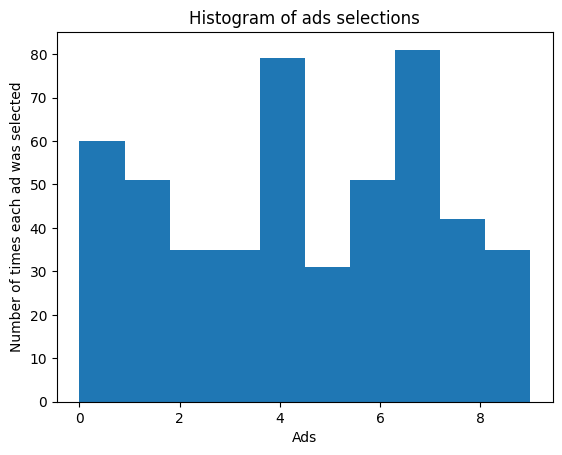

In [19]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

# Creating custom UCB function

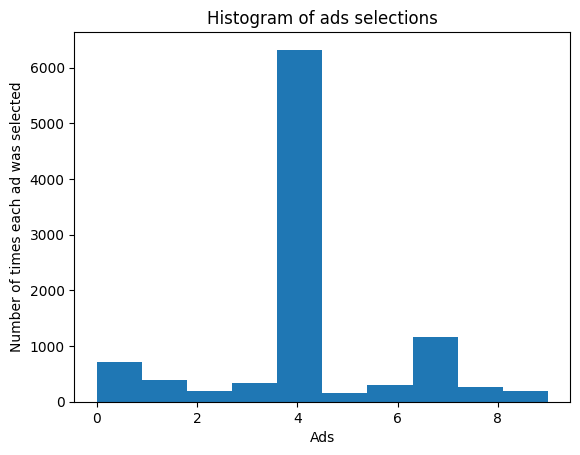

In [20]:
import math
import matplotlib.pyplot as plt
import numpy as np

def UpperConfidenceBound(ads, numbers_of_selections, sums_of_rewards, n):
  """
  Implements the Upper Confidence Bound (UCB) algorithm.

  Args:
    ads: Number of ads.
    numbers_of_selections: A list of the number of times each ad has been selected.
    sums_of_rewards: A list of the total rewards for each ad.
    n: The current iteration.

  Returns:
    The index of the ad with the highest upper confidence bound.
  """

  max_upper_bound = 0
  ad = 0

  for i in range(0, ads):
    if numbers_of_selections[i] > 0:
      average_reward = sums_of_rewards[i] / numbers_of_selections[i]
      delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])
      upper_bound = average_reward + delta_i
    else:
      upper_bound = 1e400

    if upper_bound > max_upper_bound:
      max_upper_bound = upper_bound
      ad = i

  return ad

d = 10 
N = 10000 
numbers_of_selections = [0] * d
sums_of_rewards = [0] * d

dataset = pd.read_csv('../../datasets/Ads_CTR_Optimisation.csv')

ads_selected = []
for n in range(0, N):
  ad = UpperConfidenceBound(d, numbers_of_selections, sums_of_rewards, n)
  reward = dataset.values[n, ad]
  sums_of_rewards[ad] = sums_of_rewards[ad] + reward
  numbers_of_selections[ad] = numbers_of_selections[ad] + 1
  ads_selected.append(ad)

plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()
